### Task 2- Prediction using Unsupervised ML (Clustering)
  <i>- Sawan Shivanand beli</i>

### Problem Statement

Given the data set: https://bit.ly/3kXTdox  
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### Reading Data

In [9]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of clusters for K Means(value of K)

#### Method 1: Silhouette Score

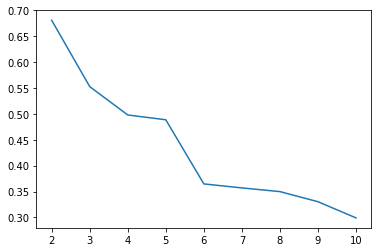

In [13]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(iris_df)
    ss.append([k, silhouette_score(iris_df, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

- The sillhouette score graph indicates that the maximum at 2 and second maximum at 3. 

#### Method 2: Elbow Curve

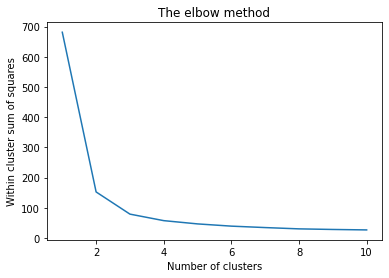

In [14]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

- From the plot of Elbow curve above, We can see that we have a break-point at 2 and 3. But since we are supposed to choose the number after which the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Hence we choose the optimum number of cluster as 3.


#### Creating the kmeans classifier

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

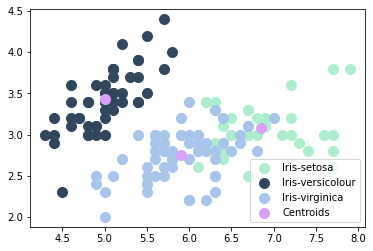

In [29]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = '#adeecf', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = '#30475e', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = '#a7c5eb', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = '#da9ff9', label = 'Centroids')

plt.legend()